## Networks

In [22]:
import matplotlib.pyplot as plt
import random

### Build a class `UndirectedGraph` :
- Adjacency List representation.
- Graph can be free or fixed (no:of vertices).
- Nodes and edges can be added.
- Plot the Degree distribution of the graph

In [23]:
class UndirectedGraph:
    def __init__(self, num_vertices=None):
        self.graph = {}
        self.num_vertices = num_vertices
        self.edgeCount = 0
        self.nodeCount = 0
        if num_vertices:
            for i in range(1,self.num_vertices+1):
                self.graph[i] = list()

    def addNode(self, node):
        if self.num_vertices is not None and (node < 1 or node > self.num_vertices):
            raise Exception("Node index cannot exceed the number of nodes")
        self.graph[node] = list()
        self.nodeCount += 1

    def addEdge(self, node1, node2):
        if node1 not in self.graph:
            self.addNode(node1)
        if node2 not in self.graph:
            self.addNode(node2)

        self.graph[node1].append(node2)
        self.graph[node2].append(node1)
        self.edgeCount += 1

    def __add__(self, other):
        new_graph = UndirectedGraph(self.num_vertices)
        
        # Copy existing graph
        new_graph.graph = {node: neighbors.copy() for node, neighbors in self.graph.items()}
        new_graph.edgeCount = self.edgeCount
        new_graph.nodeCount = self.nodeCount

        # Modify the new graph based on the type of 'other'
        if type(other) == int:
            new_graph.addNode(other)
        elif type(other) == tuple:
            new_graph.addEdge(other[0], other[1])

        return new_graph

    def __str__(self) -> str:
        result = f"Graph with {self.nodeCount if not self.num_vertices else self.num_vertices} nodes and {self.edgeCount} edges. Neighbours of the nodes are belows:\n"

        for node, neighbors in self.graph.items():
            result += f"Node {node}: {{{', '.join(map(str, neighbors))}}}\n"

        return result

    def plotDegDist(self):
        degrees = [len(neighbors) for neighbors in self.graph.values()]
        total_nodes = len(degrees)

        # Count occurrences of each degree
        degree_counts = {degree: degrees.count(degree) for degree in set(degrees)}

        # Add 0 for degrees that don't exist
        for i in range(0, self.num_vertices):
            if i not in degree_counts:
                degree_counts[i] = 0


        # Calculate fraction of nodes for each degree
        x_values = list(degree_counts.keys())

        # print(degree_counts)
        y_values = [count / total_nodes for count in degree_counts.values()]

        # Add 0 for degrees that don't exist
        # y_values += [0.0] * (self.num_vertices - len(x_values))
        # while self.num_vertices != len(x_values):
        #     x_values.append(len(x_values))
            
            
        # Calculate average node degree
        average_degree = sum(degrees) / total_nodes

        # Plot degree distribution with points
        plt.scatter(x_values, y_values, s=15, color='blue', label='Actual degree distribution')
        plt.axvline(x=average_degree, color='red', linewidth=2, label='Avg. node degree')

        plt.title("Node Degree Distribution")
        plt.xlabel("Node Degree")
        plt.ylabel("Fraction of Nodes")
        plt.legend()
        plt.grid()
        plt.show()

## Erdos-Renyi Graph 
- Create a derived class `ERRandomGraph` from the base class `UndirectedGraph` such that it should
be possible to create a Erdos-Renyi random graph $G(n,p)$. 

In [24]:
class ERRandomGraph(UndirectedGraph):
    def __init__(self, n):
        super().__init__(n)

    def sample(self, p):
        for i in range(1, self.num_vertices + 1):
            for j in range(i + 1, self.num_vertices + 1):
                if random.random() < p:
                    self.addEdge(i, j)


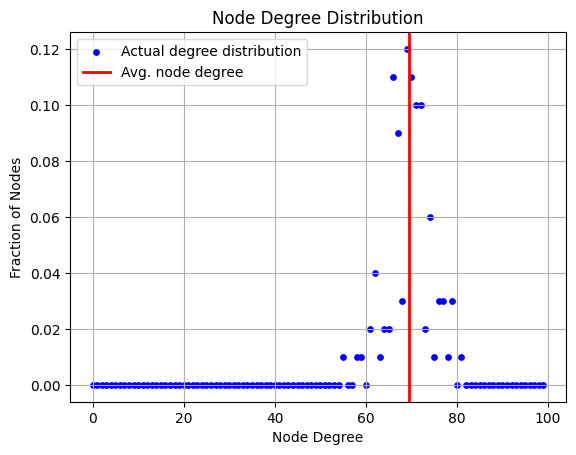

In [25]:
# The following code creates a G(100, 0.7) random graph and
# plots its degree distribution
g = ERRandomGraph(100)
g.sample(0.7)
g.plotDegDist()

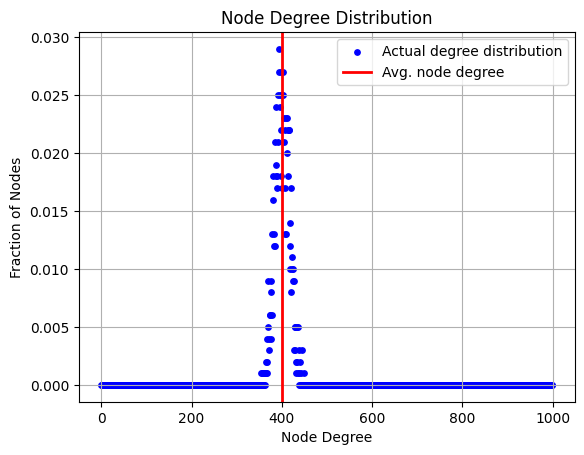

In [26]:
# The following code creates a G(1000, 0.4) random graph and
# plots its degree distribution
g = ERRandomGraph(1000)
g.sample(0.4)
g.plotDegDist()